## EDA

In [32]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("Project-II/Fraud.csv")
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [33]:
# Compute the dimensions of the data set
size,dim = data.shape
print(f"There are {size} online payments and {dim} variables.")
data = data.drop('isFlaggedFraud', axis=1) #?
print(data.head())

There are 6362620 online payments and 11 variables.
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In this case, our target variable is the binary **isFraud** that takes value 1 is the online payment was a fraud and 0 otherwise.

### Missing values

In [4]:
# Check for missing data
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


### Quality check

In [5]:
# Check data types
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

Note that the target variable *isFraud* is saved as an integer, but it should only have two possibilities either 0 or 1. In addition, to improve efficiency, we change the format of the categorical variables from *object* to *category*. The *category* type assigns each category to an numberic value, which saves memory.

In [34]:
# Define the numerical and categorical columns
numerical_cols = ['step', 'amount', 'oldbalanceOrg',
                  'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_cols = ['type', 'nameOrig', 'nameDest', 'isFraud']

# Change the type of categorical columns from object to category
for col in categorical_cols:
    data[col] = data[col].astype('category')

data.dtypes # check

step                 int64
type              category
amount             float64
nameOrig          category
oldbalanceOrg      float64
newbalanceOrig     float64
nameDest          category
oldbalanceDest     float64
newbalanceDest     float64
isFraud           category
dtype: object

We see that the data is complete since no values are missing in none of the columns. It is quite rare given the large size of the data.
Furthermore, we want to have an initial intuition of the values that each variable take. For the numerical variables we will display the main statistics and for the categorical we look for all the possible categories it takes.

In [7]:
# Display main statistics for numeric variables
data[numerical_cols].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [8]:
for col in categorical_cols:
    #print(data[col].value_counts())
    print(f"variable: {col}\n Number of categories: {len(data[col].unique())} \n Categories: {data[col].value_counts()}\n") 

variable: type
 Number of categories: 5 
 Categories: type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

variable: nameOrig
 Number of categories: 6353307 
 Categories: nameOrig
C363736674     3
C724452879     3
C2051359467    3
C1976208114    3
C2098525306    3
              ..
C1645324143    1
C1645323789    1
C1645322804    1
C1645322647    1
C1645327442    1
Name: count, Length: 6353307, dtype: int64

variable: nameDest
 Number of categories: 2722362 
 Categories: nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
              ... 
M1576076331      1
M1576076451      1
M157607653       1
M157607921       1
M1576071739      1
Name: count, Length: 2722362, dtype: int64

variable: isFraud
 Number of categories: 2 
 Categories: isFraud
0    6354407
1       8213
Name: count, dtype: int64



### Univariate distribution

We are now interested in plotting the distribution of each variable. We start with the numerical variables showing an historhgram and the estimate density.

In [ ]:
# Plotting distributions for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sns.countplot(data=data['isFraud'], ax=axes[i//2, i%2])

plt.tight_layout()

In [ ]:
pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Descriptive statistics for numerical features
descriptive_stats = data[numerical_cols].describe()
print(descriptive_stats)

# Plotting distributions for numerical features
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data, x=col, hue="isFraud", bins=30, kde=True)
    plt.title(f"Distribution of {col}", fontsize=10)

plt.tight_layout()
plt.show()

### Bivariate analysis

### Data tranformation

In [35]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
#data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1    2   9839.64  C1231006815       170136.0       160296.36   
1     1    2   1864.28  C1666544295        21249.0        19384.72   
2     1    4    181.00  C1305486145          181.0            0.00   
3     1    1    181.00   C840083671          181.0            0.00   
4     1    2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest isFraud  
0  M1979787155             0.0             0.0       0  
1  M2044282225             0.0             0.0       0  
2   C553264065             0.0             0.0       1  
3    C38997010         21182.0             0.0       1  
4  M1230701703             0.0             0.0       0  


### Cross-correlations

In order to identify possible linear relationships between the numerical variables, correlation coefficients can be analyzed. In the following we find a heatmap with all the pair-wise correlations.

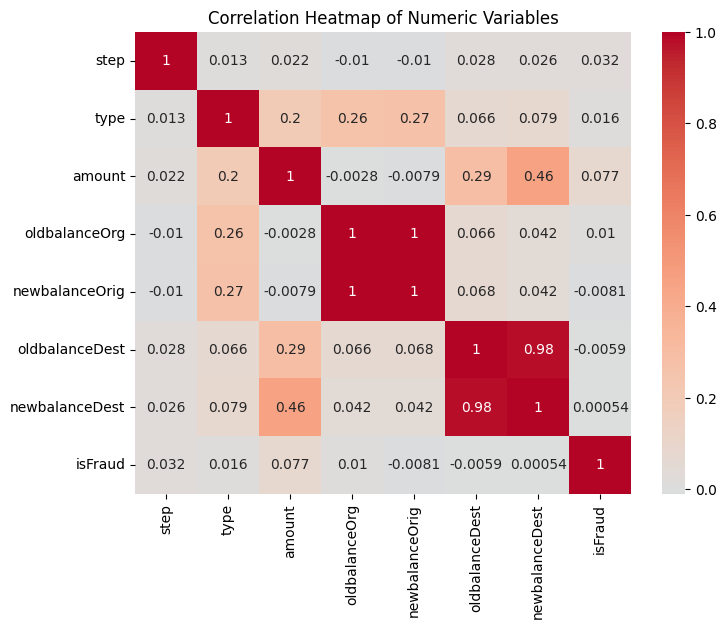

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation = data.iloc[:,[0,1,2,4,5,7,8,9]].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

### Feature selection

In [14]:
from sklearn.preprocessing import LabelEncoder

# encode categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'category' else col)

# Split the target and features
X_enc = encoded_data.drop(columns=['isFraud'])
y_enc = encoded_data['isFraud'] # target

print(X_enc.head())
print(y_enc.head())

   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     1   9839.64    757869       170136.0       160296.36   1662094   
1     1     1   1864.28   2188998        21249.0        19384.72   1733924   
2     1     3    181.00   1002156          181.0            0.00    439685   
3     1     0    181.00   5828262          181.0            0.00    391696   
4     1     1  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  
0             0.0             0.0  
1             0.0             0.0  
2             0.0             0.0  
3         21182.0             0.0  
4             0.0             0.0  
0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64


We analyze the importance of the features using decision trees. In the following we plot in descending order the importance of each variable.

In [15]:
from sklearn.tree import DecisionTreeClassifier

# create a random forest classifier model
rf_model = DecisionTreeClassifier(random_state=42)
rf_model.fit(X_enc, y_enc)

# get feature importance
feature_importance = rf_model.feature_importances_

# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X_enc.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))  # displaying the top 10 important features

#X = X[list(features_df["Feature"][:2])]

          Feature  Importance
4   oldbalanceOrg    0.382342
8  newbalanceDest    0.233694
2          amount    0.138838
7  oldbalanceDest    0.110176
0            step    0.055428
5  newbalanceOrig    0.042682
6        nameDest    0.014269
3        nameOrig    0.013230
1            type    0.009341


## Building Machine Learning models

According to what we have seen in the analysis we select the features to train various models for online fraud detection.

In [37]:
from sklearn.model_selection import train_test_split

# splitting the data
X = np.array(data[["amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data["isFraud"])

# training a decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Decision tree

In [30]:
# GRID SEARCH
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_split': [2, 5, 10], 
    'max_depth': [6, 8, 10]
}

grid_search = GridSearchCV(
estimator = DecisionTreeClassifier(random_state=42),
param_grid = param_grid,
scoring = 'recall', 
cv = 3)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best Recall: ", grid_search.best_score_)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    retur

KeyboardInterrupt: 

### Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

# Create a LogisticRegression model
clf = LogisticRegression(random_state=42, max_iter=100, class_weight='balanced')

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_reg = clf.predict(X_test_scaled)

# Display results
print("Confusion matrix:", confusion_matrix(y_test, y_pred_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_reg))
print("Sensitivity (Recall):", recall_score(y_test, y_pred_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_reg))

Confusion matrix: [[608016  27429]
 [   130    687]]
Accuracy: 0.9566860821485489
Sensitivity (Recall): 0.8408812729498164
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    635445
           1       0.02      0.84      0.05       817

    accuracy                           0.96    636262
   macro avg       0.51      0.90      0.51    636262
weighted avg       1.00      0.96      0.98    636262



In [ ]:
# Visualizacion de resultados
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, auc
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


report = classification_report(y_test,y_pred)
print(report)

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc}")

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall Auc: {pr_auc}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker = '.', label = f'PR AUC = {pr_auc: .2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['No fraude', 'Fraude'], yticklabels = ['No Fraude', 'Fraude'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



### Random Forest

In [42]:
# RANDOM FOREST CLASSIFIER (with balanced classes)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model = RandomForestClassifier(
    max_depth = 6,
    n_estimators = 100,
    class_weight='balanced',
    random_state = 42,)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Display results
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion matrix: 
 [[616924  18521]
 [     8    809]]
Accuracy: 0.9708783488562888
Sensitivity (Recall): 0.9902080783353733
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    635445
           1       0.04      0.99      0.08       817

    accuracy                           0.97    636262
   macro avg       0.52      0.98      0.53    636262
weighted avg       1.00      0.97      0.98    636262



              precision    recall  f1-score   support

           0       1.00      0.97      0.99    635445
           1       0.04      0.99      0.08       817

    accuracy                           0.97    636262
   macro avg       0.52      0.98      0.53    636262
weighted avg       1.00      0.97      0.98    636262

ROC-AUC: 0.9970767197108653
Precision-Recall Auc: 0.720287476536696


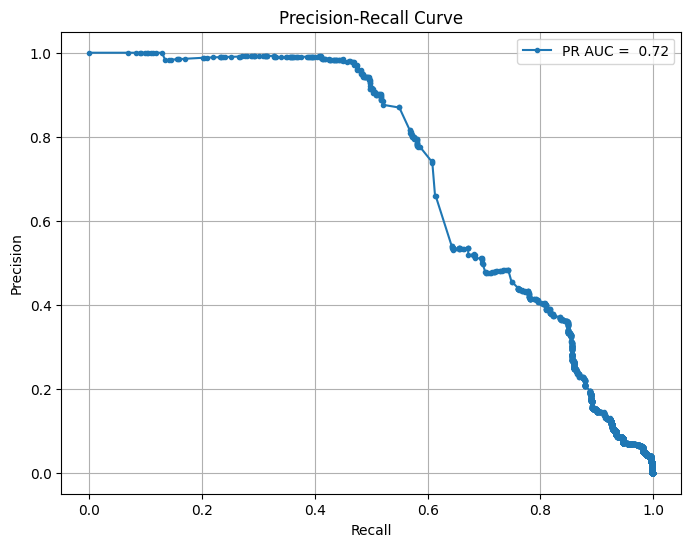

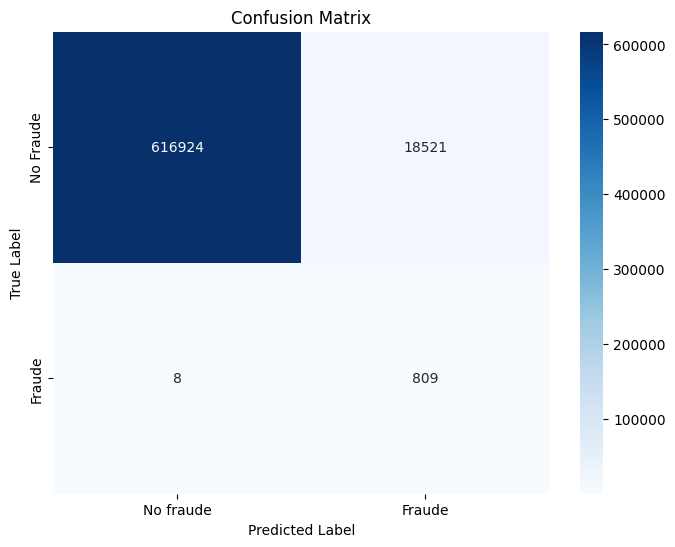

In [45]:
# Visualizacion de resultados
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, auc
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


report = classification_report(y_test,y_pred)
print(report)

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc}")

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall Auc: {pr_auc}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker = '.', label = f'PR AUC = {pr_auc: .2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['No fraude', 'Fraude'], yticklabels = ['No Fraude', 'Fraude'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# RANDOM FOREST CLASSIFIER (without balanced classes)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model = RandomForestClassifier(
    max_depth = 6,
    n_estimators = 100,
    random_state = 42,)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

# Make predictions
y_pred2 = model.predict(X_test)

# Display results
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred2))
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Sensitivity (Recall):", recall_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Confusion matrix: 
 [[635434     11]
 [   493    324]]
Accuracy: 0.9992078734860796
Sensitivity (Recall): 0.39657282741738065
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.97      0.40      0.56       817

    accuracy                           1.00    636262
   macro avg       0.98      0.70      0.78    636262
weighted avg       1.00      1.00      1.00    636262



              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.97      0.40      0.56       817

    accuracy                           1.00    636262
   macro avg       0.98      0.70      0.78    636262
weighted avg       1.00      1.00      1.00    636262

ROC-AUC: 0.9889546799637217
Precision-Recall Auc: 0.6088669096488956


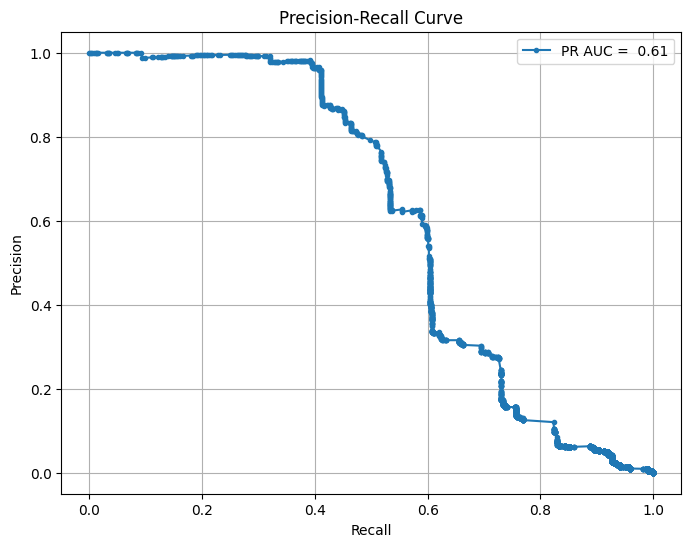

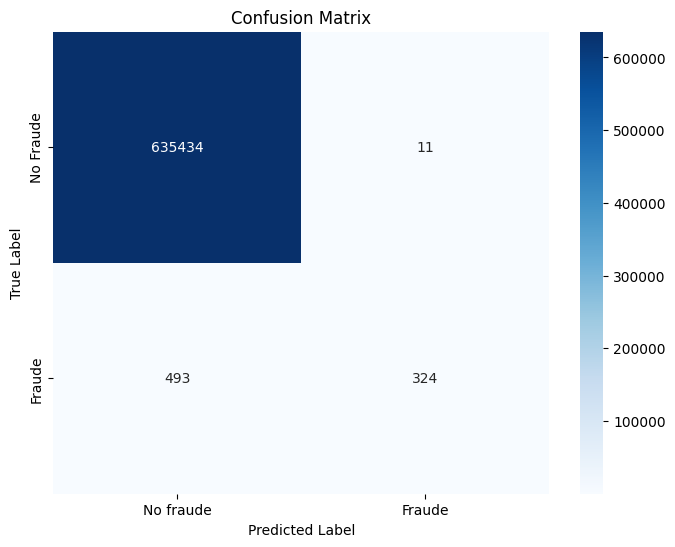

In [49]:
# Visualizacion de resultados
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, auc
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


report = classification_report(y_test,y_pred)
print(report)

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc}")

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall Auc: {pr_auc}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker = '.', label = f'PR AUC = {pr_auc: .2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['No fraude', 'Fraude'], yticklabels = ['No Fraude', 'Fraude'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# RANDOM FOREST CLASSIFIER (with balanced classes)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model = RandomForestClassifier(
    max_depth = 8,
    n_estimators = 100,
    class_weight='balanced',
    random_state = 42,)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Display results
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion matrix: 
 [[624341  11104]
 [     2    815]]
Accuracy: 0.9825449264611119
Sensitivity (Recall): 0.9975520195838433
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    635445
           1       0.07      1.00      0.13       817

    accuracy                           0.98    636262
   macro avg       0.53      0.99      0.56    636262
weighted avg       1.00      0.98      0.99    636262



              precision    recall  f1-score   support

           0       1.00      0.98      0.99    635445
           1       0.07      1.00      0.13       817

    accuracy                           0.98    636262
   macro avg       0.53      0.99      0.56    636262
weighted avg       1.00      0.98      0.99    636262

ROC-AUC: 0.9983291732844667
Precision-Recall Auc: 0.8436005270876472


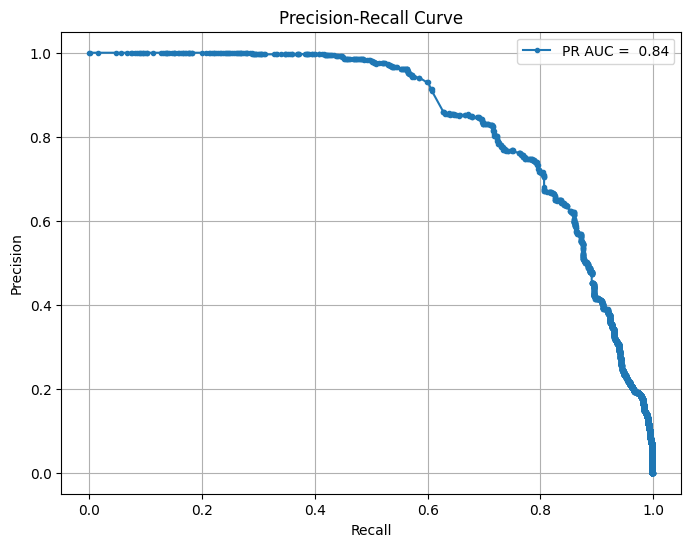

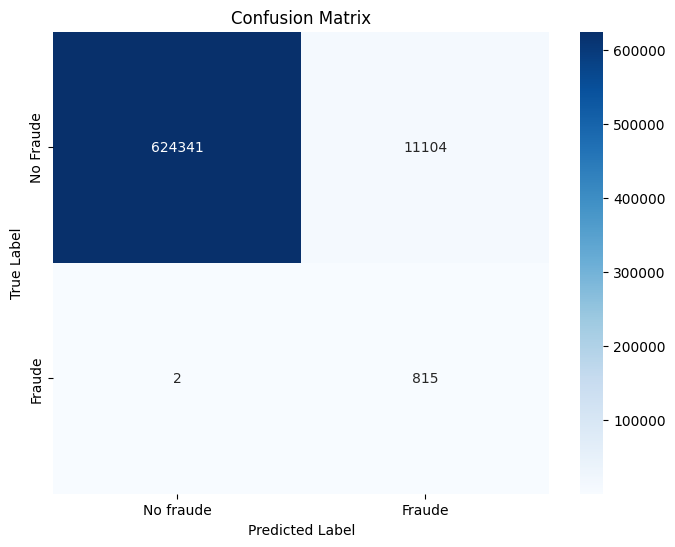

In [52]:
# Visualizacion de resultados
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, auc
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


report = classification_report(y_test,y_pred)
print(report)

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc}")

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall Auc: {pr_auc}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker = '.', label = f'PR AUC = {pr_auc: .2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['No fraude', 'Fraude'], yticklabels = ['No Fraude', 'Fraude'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()